# Timing Basic Sorting and Search Algorithms

I created this notebook as a project to introduce myself to a few famous algorithms and algorithmic complexity. In undergrad, I took an introductory programming class that did not cover algorithms, so I used David Joyner's Introduction to Computing (http://www.davidjoyner.net/b/wp-content/uploads/2017/03/Joyner_IntroductiontoComputing_1stEdition.pdf) to get acquainted with them, as well as other online sources. I thought this project would be a good place to start implementing some of what I learned.

In the first section, I create two functions to generate lists of random integers. One allows for repeats and one does not. The one that allows for repeats works well for the sorting algorithms. The one that does not allow repeats is better for timing the search algorithms because if the search term has many repeats it can be found quicker.

In the second section, I implement the Bubble Sort, an optimized version of the Bubble Sort, the Insertion Sort, and the Merge Sort.

In the third section, I implement a Linear Search and a Binary Search.

In the fourth section, I find the average run time of each algorithm at a fixed list length.

In the final section, I graph the average run time over different list lenghts.

In the bonus section, I determine the algorithmic complexity of my functions to time and plot the sorting and searching algorithms.

## I. Creating the List to be Sorted

As previously mentioned, this section just creates the functions that create the lists to be searched and sorted.

In [1]:
# Imports the random function for generating random numbers
from numpy import random

# Imports the log2 function for the 
from numpy import log2

# Imports the timeit library to time the performance of sort and search algorithms
import timeit

# This next block of code defines a function that creates a list of random 
# integers. The length of the list and bounds of the integers are determined
# by the user.

def rand_int_list(length, lower_bound, upper_bound):
    
    # creates an empty list that will be appended with random integers
    my_list = []
    
    # creates a variable that will be incremented up to the length amount
    # allowing the while loop to run the number of times as the user
    # inputed length
    count = 0
    
    # starts the while loop that will run while count is less than
    # the user determined length
    while count < length:
        
        # appends a random integer between the lower and upper bounds determined
        # by the user to my_list
        my_list.append(random.randint(lower_bound, upper_bound))
        
        # increments the count by 1 for each iteration of the loop
        count += 1
        
    # returns the list of random integers
    return my_list

def rand_int_list_no_repeats(length, lower_bound, upper_bound):
    
    if length < (upper_bound - lower_bound):
    
        # creates an empty list that will be appended with random integers
        my_list = []
    
        # creates a variable that will be incremented up to the length amount
        # allowing the while loop to run the number of times as the user
        # inputed length
        count = 0
    
        my_array = list(range(lower_bound, upper_bound))
        random.shuffle(my_array)
    
        # starts the while loop that will run while count is less than
        # the user determined length
        while count < length:
        
            # appends a random integer between the lower and upper bounds determined
            # by the user to my_list
            my_list.append(my_array.pop(random.randint(len(my_array) - 1)))
        
            # increments the count by 1 for each iteration of the loop
            count += 1
        
        # returns the list of random integers
        return my_list
    
    else:
        print('Desired length must be less than the upper bound minus lower bound.') 

# creates a smaller list to show that the sort algorithms are properly sorting
example_list = rand_int_list(10, 0, 10)

# creates a copy of the example_sort for each of the sorting algorithms to show that they are
# actually functioning
(ex_bub_list, ex_opt_bub_list, ex_insert_list, 
 ex_merge_list, ex_linear_list, ex_binary_list) = (example_list.copy(), example_list.copy(), 
                                                   example_list.copy(), example_list.copy(),
                                                   example_list.copy(), example_list.copy())

## II. Sorting Algorithms

I chose the sorting algorithms that I did because I had seen them before. Not necessarily the best reason, but there it is. It worked out well though because the Bubble Sort, on average, acts as a slower O(n^2) and the Optimized Bubble Sort demonstrates that you can increase the speed of a O(n^2) algorithm, but it is still O(n^2) and will experience its average run time grow at that rate. The Insertion Sort further demonstrates that fact. The Merge Sort is, on average, a O(n * log(n)) sorting algorithm, so it will be faster than the others and will grow at a slower rate as well.

I won't discuss each algorithm in detail, but the comments on the code should illustrate how the algorithm works. I also linked to the wikipedia page for each algorithm.

### A. Bubble Sort (https://en.wikipedia.org/wiki/Bubble_sort)

In [2]:
def Bubble_Sort(my_list):
    
    # initializes swapped as True so the while loop will execute at least once
    swapped = True
  
    # this loop runs while there was a swap of elements in the previous round
    while swapped == True:
        
        # sets swapped equal to False so if there are no swaps this iteration
        # the loop ends
        swapped = False
        
        # looks at the first element in the list to the second to last element of the list
        for i in range(len(my_list) - 1):
            
            # executes the below code it the element on the left is larger than the
            # element on the right (ie the pair is unsorted)
            if my_list[i] > my_list[i + 1]:
                
                # if this code is being executed a swap occured and we want to indicate
                # that fact so the while loop keeps executing
                swapped = True
                
                # creates a temporary variable that will store the larger value to be
                # swapped right
                storage = my_list[i]
                
                # deletes the unsorted larger element
                del my_list[i]
                
                # inserts the larger element to the right of the smaller element
                my_list.insert(i + 1, storage)
    
    # returns the sorted list
    return my_list

print('Unsorted List: ', example_list)
print('Sorted List: ', Bubble_Sort(ex_bub_list))

Unsorted List:  [1, 1, 8, 3, 8, 1, 3, 1, 0, 0]
Sorted List:  [0, 0, 1, 1, 1, 1, 3, 3, 8, 8]


### B. Optimized Bubble Sort

In [3]:
def Optimized_Bubble_Sort(my_list):
    
    # initializes swapped as True so the while loop will execute at least once
    swapped = True
    
    # creates a variable that is the max index checked by the swap (second to last
    # because of the use of the range function)
    max_index = len(my_list) - 1
  
    # this loop runs while there was a swap of elements in the previous round and
    # the max index is 1 or greater (the range function is used for the for loop
    # so when it is equal to 1 the for loop still checks the first pair of elements)
    while swapped == True and max_index > 0:
        
        # sets swapped equal to False so if there are no swaps this iteration
        # the loop ends
        swapped = False
        
        # because the range function stops at the integer before the input, the
        # second to last index is the last element to be compared, which makes
        # sense because there is nothing to the right of the last element
        for i in range(max_index):
            
            # executes the below code it the element on the left is larger than the
            # element on the right (ie the pair is unsorted)
            if my_list[i] > my_list[i + 1]:
                
                # if this code is being executed a swap occured and we want to indicate
                # that fact so the while loop keeps executing
                swapped = True
                
                # creates a temporary variable that will store the larger value to be
                # swapped right
                storage = my_list[i]
                
                # deletes the unsorted larger element
                del my_list[i]
                
                # inserts the larger element to the right of the smaller element
                my_list.insert(i + 1, storage)
        
        # because the largest element goes to the end of the list after the first iteration
        # the second largest element goes to the second to last postion after the second
        # iteration, and so on, time is saved by not rechecking those elements, which is why
        # max_index decreases by 1 every iteration
        max_index -= 1
    
    # returns the sorted list
    return my_list

print('Unsorted List: ', example_list)
print('Sorted List: ', Optimized_Bubble_Sort(ex_opt_bub_list))

Unsorted List:  [1, 1, 8, 3, 8, 1, 3, 1, 0, 0]
Sorted List:  [0, 0, 1, 1, 1, 1, 3, 3, 8, 8]


### C. Insertion Sort (https://en.wikipedia.org/wiki/Insertion_sort)

In [4]:
def Insertion_Sort(my_list):
    
    # creates a copy of the input list so changes to the inputed list don't affect it
    # ie. running the function repeatedly on the list don't delete the first entry
    # until the list is empty
    unsorted_list = my_list.copy()
    
    # creates a list that will hold the sorted input list initialized with the first
    # element of the unsorted list
    sorted_list = [unsorted_list[0]]
    
    # deletes the first element in the unsorted list because it is now in the sorting
    # list
    del unsorted_list[0]
     
    # loops through the items in the unsorted list
    for i in unsorted_list:    
        
        # if the item in the unsorted list is greater than or equal to the last item in the sorted
        # list, it will be appended to the end of the sorted list
        if i >= sorted_list[len(sorted_list) - 1]:
            sorted_list.append(i)
            
        # if the item in the unsorted list is less than the last item in the sorted list...
        else:
            
            # loops throught the indexes in the sorted list
            for j in range(len(sorted_list)):
                
                # if the item in the unsorted list is less than or equal to the element at the
                # jth index of the sorted list, it is inserted in its place and the loop is
                # cut off
                if i <= sorted_list[j]:
                    sorted_list.insert(j,  i)
                    break
    
    # returns the sorted list
    return sorted_list

print('Unsorted List: ', example_list)
print('Sorted List: ', Insertion_Sort(ex_bub_list))

Unsorted List:  [1, 1, 8, 3, 8, 1, 3, 1, 0, 0]
Sorted List:  [0, 0, 1, 1, 1, 1, 3, 3, 8, 8]


### D. Merge Sort (https://en.wikipedia.org/wiki/Merge_sort)

In [5]:
def Merge_Sort(my_list):
    
    # if the list is two or more elements...
    if len(my_list) > 1:
        
        # creates an empty list that will store the sorted list
        sorted_list = []
        
        # creates a variable to hold the middle index by using floor division to divide the list
        # in half and round down
        mid_index = len(my_list) // 2
        
        # recursively breaks the input list down until it creates 1 element lists
        left_list = Merge_Sort(my_list[:mid_index])
        right_list = Merge_Sort(my_list[mid_index:])
        
        # while the left_list and right_list lists are not empty...
        while (len(left_list) > 0) and (len(right_list) > 0):
            
            # if the first element of the left list is less than the first element in the right list,
            # it is added to the sorted list and deleted from the left list
            if left_list[0] < right_list[0]:
                sorted_list.append(left_list[0])
                del left_list[0]
            
            # if the first element of the right list is equal to or less than the first element in 
            # the left list, it is added to the sorted list and deleted from the right list
            else:
                sorted_list.append(right_list[0])
                del right_list[0]
        
        # once one of the lists is empty, the loop exits and the elements in the non-empty list are
        # added to the end of the sorted_list
        sorted_list.extend(left_list)
        sorted_list.extend(right_list)
        
    # if the list is one element of an empty list, it is returned, which is very important to provide
    # an end point for the recursion process
    else:
        
        # returns the list
        return my_list
    
    # returns the sorted list
    return sorted_list

print('Unsorted List: ', example_list)
print('Sorted List: ', Merge_Sort(ex_merge_list))  

Unsorted List:  [1, 1, 8, 3, 8, 1, 3, 1, 0, 0]
Sorted List:  [0, 0, 1, 1, 1, 1, 3, 3, 8, 8]


## III. Search Algorithms

The Linear Search has a linear complexity [O(n)] and is good for searching through unsorted lists.

The Binary Search requires a sorted list as an input. On average, it is of O(log(n)) complexity, excluding sorting time. The number of operations it has to perform grows slower than the growth rate of the the input list. When it has to sort the list prior to searching (assuming a O(n * log(n) sorting algorithm), its complexity becomes O(n * log(n)), which is a faster growth rate than O(n).

I won't discuss each algorithm in detail, but the comments on the code should illustrate how the algorithm works. I also linked to the wikipedia page for each algorithm.

### A. Linear Search (https://en.wikipedia.org/wiki/Linear_search)

In [6]:
def Linear_Search(my_list, target_value):
    
    # loops through the indexes in the input list
    for i in range(len(my_list)):
        
        # if the value at the index is equal to our target value, the index is returned
        if my_list[i] == target_value:
            return i
        
    # if the loop goes through the end of the list and isn't found then this is returned    
    return 'Value not found!'

search_term = random.randint(0, 10)

print('Searching for ' + str(search_term) + ' in list ' + str(ex_linear_list))
print()
print('Index of Search Term: ', Linear_Search(ex_linear_list, search_term))

Searching for 7 in list [1, 1, 8, 3, 8, 1, 3, 1, 0, 0]

Index of Search Term:  Value not found!


### B. Binary Search (https://en.wikipedia.org/wiki/Binary_search_algorithm)

In [7]:
def Binary_Search(my_list, target_value):
    
    # binary search requires a sorted list, so this function will call the built-in python
    # sort method because it is faster than any sorting algorithm I have implemented
    my_list.sort()
    
    # initializes the minimum index at 0
    min_index = 0
    
    # initializes the maximum index at the maximum index of the list + 1
    max_index = len(my_list) 
    
    # sets the maximum number of iterations as the base 2 log of the length of the sorted list
    max_iterations = round(log2(len(my_list)))
    
    # initializes found as False
    found = False
    
    # while the number of max iterations is greater than or equal to zero and the target has not
    # been found...
    while max_iterations >= 0 and found == False:
        
        # a variable is created to hold the middle index
        mid_index = (max_index + min_index) // 2        
        
        # if the target value is lower than the element at the middle index of the sorted list, a
        # new list is generated holding the elements to the left of that index and the Binary 
        if target_value < my_list[mid_index]:   
            max_index = mid_index

        # if the target value is greater than the element at the middle index of the sorted list, a
        # new list is generated holding the elements to the right of that index and the Binary    
        elif target_value > my_list[mid_index]:
            min_index = mid_index

        # if the element at the middle index equals the target value, the index within the sorted
        # list and the sorted list are returned
        else:
            found = True
            return {'index': mid_index, 'sorted list': my_list}
        
        max_iterations -= 1
        
    else:
        return 'Value not found!'

print('Searching for ' + str(search_term) + ' in list ' + str(ex_binary_list))
print()
print(Binary_Search(ex_binary_list, search_term))

Searching for 7 in list [1, 1, 8, 3, 8, 1, 3, 1, 0, 0]

Value not found!


In [8]:
def Binary_Search_pre_sort(my_list, target_value):
    
    # initializes the minimum index at 0
    min_index = 0
    
    # initializes the maximum index at the maximum index of the list + 1
    max_index = len(my_list) 
    
    # sets the maximum number of iterations as the base 2 log of the length of the sorted list
    max_iterations = round(log2(len(my_list)))
    
    # initializes found as False
    found = False
    
    # while the number of max iterations is greater than or equal to zero and the target has not
    # been found...
    while max_iterations >= 0 and found == False:
        
        # a variable is created to hold the middle index
        mid_index = (max_index + min_index) // 2        
        
        # if the target value is lower than the element at the middle index of the sorted list, a
        # new list is generated holding the elements to the left of that index and the Binary 
        if target_value < my_list[mid_index]:   
            max_index = mid_index

        # if the target value is greater than the element at the middle index of the sorted list, a
        # new list is generated holding the elements to the right of that index and the Binary    
        elif target_value > my_list[mid_index]:
            min_index = mid_index

        # if the element at the middle index equals the target value, the index within the sorted
        # list and the sorted list are returned
        else:
            found = True
            return mid_index
        
        max_iterations -= 1
        
    else:
        return 'Value not found!'

    
ex_binary_list_sorted = example_list.copy()
ex_binary_list.sort()
print('Searching for ' + str(search_term) + ' in list ' + str(ex_binary_list))
print()
print('Index of Search Term :', Binary_Search_pre_sort(ex_binary_list_sorted, search_term))

Searching for 7 in list [0, 0, 1, 1, 1, 1, 3, 3, 8, 8]

Index of Search Term : Value not found!


## IV. Timing the Algorithms

The code below produces average run speeds of each algorithm using user specified parameters. As we would expect,
Bubble Sort is slower than the Optimized version of itself. Merge Sort and Insertion Sort are the fastest sorting algorithms.

The pre-sorting the list doesn't make a difference in run time for the linear search, as expected, but there is a multiple orders of magnitude difference in pre-sorting the lists for binary search. As previously mentioned, using a pre-sorted list vs. having to sort the input list is the difference between O(log(n)) and O(n * log(n)) for binary search.

Average run times tells us something about the comparative speed of each algorithm at a fixed list length, but we need to plot the average run speeds over various list lengths to get a better understanding of the complexity of each algorithm.

In [9]:
# this code allows the sorting and search functions be passed to the timeit module without
# arguments, which is the format timeit requires to run
def wrapper(func, *args):
    def wrapped():
        return func(*args)
    return wrapped 

# this function prints out the average run time of the sorting algorithms over a specified number of 
# iterations
def avg_sort_time(number_of_sorts, length, lower_bound, upper_bound):
    
    # initializes the runtimes at 0
    bubble_time = 0
    opt_bubble_time = 0
    insert_time = 0
    merge_time = 0
    
    # performs the inputed number of iterations, sorting a new list of random integers each iteration
    # and then adds the runtime of that iteration to the associated runtime variable
    for i in range(number_of_sorts):
        
        list_to_sort = rand_int_list(length, lower_bound, upper_bound)
        (bub_list, opt_bub_list, insert_list, merge_list) = (list_to_sort.copy(), list_to_sort.copy(), 
                                                             list_to_sort.copy(), list_to_sort.copy())
        bubble_sort = wrapper(Bubble_Sort, bub_list)
        bubble_time += timeit.timeit(bubble_sort, number = 1)

        optimized_bubble_sort = wrapper(Optimized_Bubble_Sort, opt_bub_list)
        opt_bubble_time += timeit.timeit(optimized_bubble_sort, number = 1)

        insertion_sort = wrapper(Insertion_Sort, insert_list)
        insert_time += timeit.timeit(insertion_sort, number = 1)

        merge_sort = wrapper(Merge_Sort, merge_list)
        merge_time += timeit.timeit(merge_sort, number = 1)
        
    # averages the total runtimes by the number of iterations performed    
    avg_bubble_time = bubble_time / number_of_sorts
    avg_opt_bubble_time = opt_bubble_time / number_of_sorts
    avg_insert_time = insert_time / number_of_sorts
    avg_merge_time = merge_time / number_of_sorts
    
    return print('Average Bubble Sort Run Time over ' + str(number_of_sorts) + ' iterations on ' +
                 str(length) + ' element lists: ' + str(avg_bubble_time) + ' ms' 
                 + '\n' + '\n' +
                 'Average Optimized Bubble Sort Run Time over ' + str(number_of_sorts) + ' iterations on ' 
                 + str(length) + ' element lists: ' + str(avg_opt_bubble_time) + ' ms' 
                 + '\n' + '\n' +    
                 'Average Insertion Sort Run Time over ' + str(number_of_sorts) + ' iterations on ' + 
                 str(length) + ' element lists: ' + str(avg_insert_time) + ' ms' 
                 + '\n' + '\n' +
                 'Average Merge Sort Run Time over ' + str(number_of_sorts) + ' iterations on ' + 
                 str(length) + ' element lists: ' + str(avg_merge_time) + ' ms' + '\n')

# this function does the same as the above function, but for the search algorithms
def avg_search_time(number_of_searches, length, lower_bound, upper_bound, pre_sort):
    
    linear_time = 0
    binary_time = 0
    
    # a non-exhaustive list of possibilities that will cause the function to not function
    if (number_of_searches < 1) or (length >= (upper_bound - lower_bound)) or ((pre_sort != True) and (pre_sort != False)):
        print('Error: One or more inputs are invalid!')
    
    # times the algorithms, including the sorting time for binary search
    elif pre_sort == False:
    
        for i in range(number_of_searches):
        
            search_list = rand_int_list_no_repeats(length, lower_bound, upper_bound)
        
            search_value = random.randint(lower_bound, upper_bound)
        
            linear_search = wrapper(Linear_Search, search_list, search_value)
            linear_time += timeit.timeit(linear_search, number = 1)
        
            binary_search = wrapper(Binary_Search, search_list, search_value)
            binary_time += timeit.timeit(binary_search, number = 1)
        
        avg_linear_time = linear_time / number_of_searches
        avg_binary_time = binary_time / number_of_searches
    
        return print('Average Linear Search Time over ' + str(number_of_searches) + ' iterations on ' + 
                     str(length) + ' element un-sorted lists: ' + str(1000 * avg_linear_time) + ' ms' + '\n' 
                     + '\n' +
                     'Average Binary Search Time over ' + str(number_of_searches) + ' iterations on ' + 
                     str(length) + ' element un-sorted lists: ' + str(1000 * avg_binary_time) + ' ms' + '\n')
    
    # times the search algorithms on pre-sorted lists
    elif pre_sort == True:
    
        for i in range(number_of_searches):
        
            search_list = list(range(length + 1))
        
            search_value = random.randint(length)
        
            linear_search = wrapper(Linear_Search, search_list, search_value)
            linear_time += timeit.timeit(linear_search, number = 1)
        
            binary_search = wrapper(Binary_Search_pre_sort, search_list, search_value)
            binary_time += timeit.timeit(binary_search, number = 1)
        
        avg_linear_time = linear_time / number_of_searches
        avg_binary_time = binary_time / number_of_searches
    
        return print('Average Linear Search Time over ' + str(number_of_searches) + ' iterations on ' + 
                     str(length) + ' element sorted lists: ' + str(1000 * avg_linear_time) + ' ms' + '\n' 
                     + '\n' +
                     'Average Binary Search Time over ' + str(number_of_searches) + ' iterations on ' + 
                     str(length) + ' element sorted lists: ' + str(1000 * avg_binary_time) + ' ms' + '\n')

# returns the average sort or search times of each algorithm
avg_sort_time(500, 100, 0, 101)
avg_search_time(500, 1000, 0, 1001, False)
avg_search_time(500, 1000, 0, 1001, True)

Average Bubble Sort Run Time over 500 iterations on 100 element lists: 0.0013335777541328153 ms

Average Optimized Bubble Sort Run Time over 500 iterations on 100 element lists: 0.0010453950592764474 ms

Average Insertion Sort Run Time over 500 iterations on 100 element lists: 0.00017052541913384738 ms

Average Merge Sort Run Time over 500 iterations on 100 element lists: 0.00030609287436595046 ms

Average Linear Search Time over 500 iterations on 1000 element un-sorted lists: 0.035206412232422934 ms

Average Binary Search Time over 500 iterations on 1000 element un-sorted lists: 0.2363959435712708 ms

Average Linear Search Time over 500 iterations on 1000 element sorted lists: 0.026421611531016964 ms

Average Binary Search Time over 500 iterations on 1000 element sorted lists: 0.013520422226234174 ms



## V. Graphing the Average Algorith Run Times

I plotted the average run times for a user specified number of iterations at each step because sometimes the lists generated are optimal for the task being performed and the algorithms performs much faster than the average case. Averaging dampens this variability.

The graphs are as expected.

The bubble sorts (regular and optimized) and the insertion sort are all growing at a quadratic pace. The Merge Sort and Binary Search **with sorting** are growing at the quasilinear pace of n * log(n).

The linear search is growing at a linear rate, both with a pre-sorted list and without, as expected.

The difference in the graphs of average run time for the Binary Search with pre-sorting and without pre-sorting puts in graphical terms the difference in algorithmic complexity between O(log(n)) and O(n * log(n)).

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 4]

def plot_sort_time(sort_type, max_trials, step, iterations_for_avg):
    
    x = []
    y = []
    
    for i in range(1, max_trials + 1, step):
        my_time = 0
        for j in range(iterations_for_avg + 1):
            trial_list = rand_int_list(i, 0, i + 1)
            sort = wrapper(sort_type, trial_list)
            my_time += timeit.timeit(sort, number = 1)
        x.append(i)
        y.append(1000 * (my_time / iterations_for_avg))
    
    plt.scatter(x,y)
    plt.plot(x,y)
    plt.xlabel('Length of List being Sorted')
    plt.ylabel('Run Time in Milliseconds')
    plt.title('Run Time of ' + str(sort_type) + ' Sort in Milliseconds')
    plt.ylim(bottom = 0)
    plt.show()

def plot_search_time(search_type, max_trials, step, iterations_for_avg, pre_sort):
    
    x = []
    y = []
    
    # a non-exhaustive list of possibilities that will cause the function to not function
    if (step > max_trials) or (max_trials < 0) or (step < 0) or ((pre_sort != False) and (pre_sort != True)):
        print('Error: One or more inputs are invalid!')
    
    elif pre_sort == False:
       
        for i in range(1, max_trials + 1, step):
            my_time = 0
            for j in range(iterations_for_avg):
                trial_list = rand_int_list_no_repeats(i, 0, i + 1)
                search_value = random.randint(i)
                search = wrapper(search_type, trial_list, search_value)
                my_time += timeit.timeit(search, number = 1)
            x.append(i)
            y.append(1000 * (my_time / iterations_for_avg))
    
        plt.scatter(x,y)
        plt.plot(x,y)
        plt.xlabel('Length of List being Searched')
        plt.ylabel('Run Time in Milliseconds')
        plt.title('Run Time of ' + str(search_type) + ' in Milliseconds')
        plt.ylim(bottom = 0)
        plt.show()
    
    elif pre_sort == True:
    
        for i in range(1, max_trials + 1, step):
            my_time = 0
            for j in range(iterations_for_avg):
                trial_list = list(range(i + 1))
                search_value = random.randint(i)
                search = wrapper(search_type, trial_list, search_value)
                my_time += timeit.timeit(search, number = 1)
            x.append(i)
            y.append(1000 * (my_time / iterations_for_avg))
    
        plt.scatter(x,y)
        plt.plot(x,y)
        plt.xlabel('Length of List being Searched')
        plt.ylabel('Run Time in Milliseconds')
        plt.title('Run Time of ' + str(search_type) + ' on pre-sorted Lists in Milliseconds')
        plt.ylim(bottom = 0)
        plt.show()

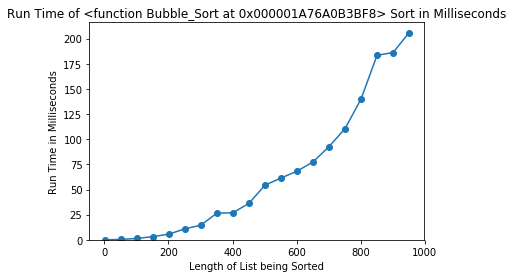

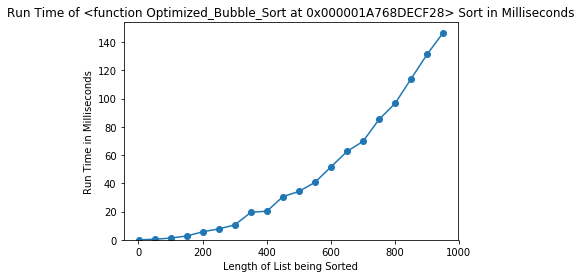

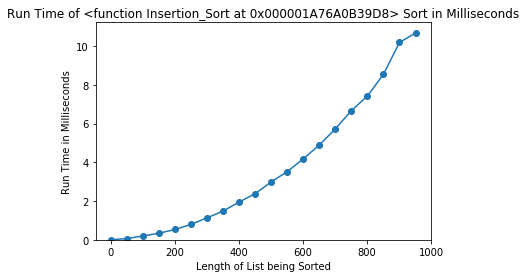

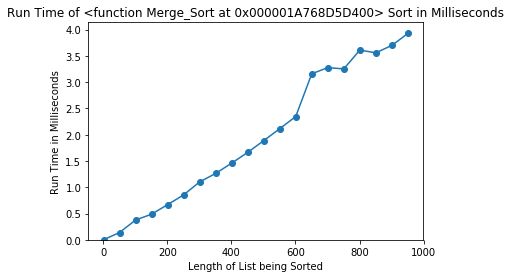

In [11]:
for sorting_alg in (Bubble_Sort, Optimized_Bubble_Sort, Insertion_Sort, Merge_Sort):
    plot_sort_time(sorting_alg, 1000, 50, 100)

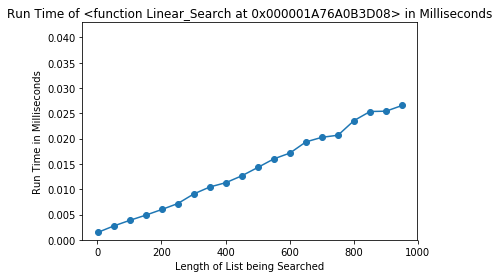

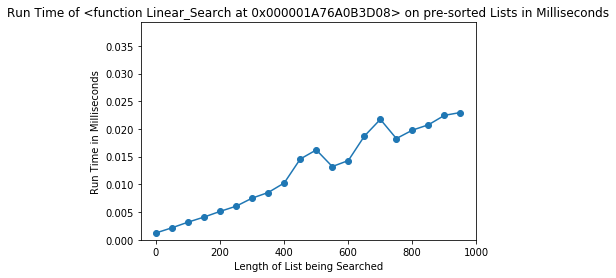

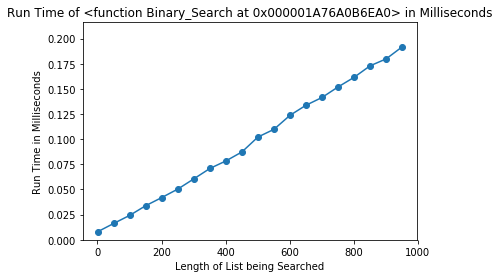

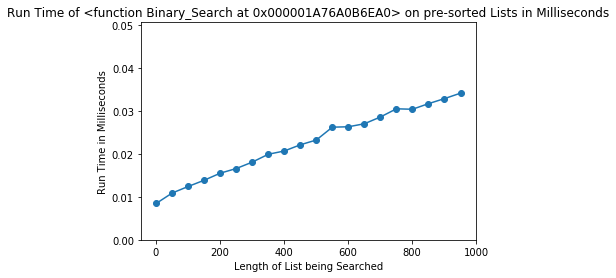

In [12]:
for search_alg in (Linear_Search, Binary_Search):
    for boolean in (False, True):
        plot_search_time(search_alg, 1000, 50, 5000, boolean)

This is the end of the project. I learned a lot while working on it and I hope you learned something too.